## Additional Experiments :
* Look at the mae, mse but especially mape
* See what happens when we reduce the layer 
* See what happens when we increase the information by including distance
* Split temperature for higher layers with lower layers
* Look at what degree of columns is enough - does decreasing reduce the r2 and increasing increase the r2 ?
* Other algorithms - especially linear ones does it help

In [2]:
from utility import *

In [3]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy.random import choice
import scikitplot as skplt

In [4]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from xgboost import XGBRegressor

In [5]:
def mean_absolute_percentage_error(y_true, y_pred):
	'''
	scikit(sklearn) does not have support for mean absolute percentage error MAPE.
	This is because the denominator can theoretically be 0 and so the value would be undefined.
	So this is our implementation
	'''
# 	y_true = check_array(y_true)
# 	y_pred = check_array(y_pred)

	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def r2(y_true,y_pred):
    return r2_score(y_true,y_pred)

def mse(y_true,y_pred):
    return mean_squared_error(y_true,y_pred)

def mae(y_true,y_pred):
    return mean_absolute_error(y_true,y_pred)

def mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true,y_pred)

In [20]:
df = pd.read_csv('additive_complete.csv')

In [43]:
df['euclidean_distance_laser'] = df.apply(lambda row: sqrt(row['x_distance']**2 + row['y_distance']**2 + row['z_distance']**2), axis=1)

In [21]:
df.head()

,timestep,x_voxel,y_voxel,z_voxel,timeOfCreation,x_laser,y_laser,z_laser,x_distance,y_distance,...,T18_t_t-1,T19_t_t-1,T20_t_t-1,T21_t_t-1,T22_t_t-1,T23_t_t-1,T24_t_t-1,T25_t_t-1,T26_t_t-1,T_self
0,1.0,14.5,1.0,0.5,0.5,0.0,0.75,0.5,14.5,0.25,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
1,1.0,1.5,4.0,1.5,1.5,0.0,0.75,0.5,1.5,3.25,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
2,1.0,2.0,2.5,1.5,1.5,0.0,0.75,0.5,2.0,1.75,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
3,1.0,6.5,4.0,1.5,1.5,0.0,0.75,0.5,6.5,3.25,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
4,1.0,13.0,13.5,1.0,1.0,0.0,0.75,0.5,13.0,12.75,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0


In [37]:
neighborColumns = []
for neighbor in range(26):
    neighborColumns += ['T'+str(neighbor+1)+'_t_t-1']

In [12]:
len(df),1604202/3

(1604202, 534734)

In [13]:
testSplit = 534734

In [24]:
y = df['T_self']

### Included the time of creation 

In [22]:
featureColumns = ['timestep','x_distance','y_distance','z_distance','timeOfCreation','T0_t-1']+neighborColumns
df_mod = df[featureColumns]

In [23]:
df_mod.head()

,timestep,x_distance,y_distance,z_distance,timeOfCreation,T0_t-1,T1_t_t-1,T2_t_t-1,T3_t_t-1,T4_t_t-1,...,T17_t_t-1,T18_t_t-1,T19_t_t-1,T20_t_t-1,T21_t_t-1,T22_t_t-1,T23_t_t-1,T24_t_t-1,T25_t_t-1,T26_t_t-1
0,1.0,14.5,0.25,0.0,0.5,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
1,1.0,1.5,3.25,1.0,1.5,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
2,1.0,2.0,1.75,1.0,1.5,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
3,1.0,6.5,3.25,1.0,1.5,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
4,1.0,13.0,12.75,0.5,1.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0


In [74]:
df['T_self'].describe()

count    1.604202e+06
mean     6.398227e+02
std      4.868362e+02
min      3.000000e+02
25%      3.000000e+02
50%      3.000000e+02
75%      8.522900e+02
max      6.155710e+03
Name: T_self, dtype: float64

In [25]:
X = df_mod.loc[:,featureColumns ]
X_train,y_train = shuffle(X[:-testSplit], y[:-testSplit])
X_test,y_test = shuffle(X[-testSplit:], y[-testSplit:])

In [26]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9314224734818081, 3.301970529247385)

<i><font color="magenta"> Adding the time of creation did not really help in any way<br>Ridge also does not perform any better </font></i>

In [28]:
ridge = Ridge()
ridge.fit(X_train,y_train)
predicted = ridge.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9314224746626374, 3.3019625870952805)

### No timestep and time of creation

In [29]:
featureColumns = ['x_distance','y_distance','z_distance','T0_t-1']+neighborColumns
X = df.loc[:,featureColumns ]
y = df['T_self']

In [30]:
X_train,y_train = shuffle(X[:-testSplit], y[:-testSplit])
X_test,y_test = shuffle(X[-testSplit:], y[-testSplit:])

In [31]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9311025056310765, 3.0578787073533804)

<i><font color="blue"> Removing timestep did not impact as well </font></i>

### Only absolute distance - instead of x,y,z 

In [45]:
featureColumns = ['euclidean_distance_laser','T0_t-1']+neighborColumns
X = df.loc[:,featureColumns ]
y = df['T_self']

In [48]:
X.head()

,euclidean_distance_laser,T0_t-1,T1_t_t-1,T2_t_t-1,T3_t_t-1,T4_t_t-1,T5_t_t-1,T6_t_t-1,T7_t_t-1,T8_t_t-1,...,T17_t_t-1,T18_t_t-1,T19_t_t-1,T20_t_t-1,T21_t_t-1,T22_t_t-1,T23_t_t-1,T24_t_t-1,T25_t_t-1,T26_t_t-1
0,14.502155,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
1,3.716517,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
2,2.839454,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
3,7.335700,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
4,18.215721,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0


In [61]:
df.columns

Index([u'timestep', u'x_voxel', u'y_voxel', u'z_voxel', u'timeOfCreation',
       u'x_laser', u'y_laser', u'z_laser', u'x_distance', u'y_distance',
       u'z_distance', u'euclidean_distance_laser', u'T0_t-1', u'T1_t_t-1',
       u'T2_t_t-1', u'T3_t_t-1', u'T4_t_t-1', u'T5_t_t-1', u'T6_t_t-1',
       u'T7_t_t-1', u'T8_t_t-1', u'T9_t_t-1', u'T10_t_t-1', u'T11_t_t-1',
       u'T12_t_t-1', u'T13_t_t-1', u'T14_t_t-1', u'T15_t_t-1', u'T16_t_t-1',
       u'T17_t_t-1', u'T18_t_t-1', u'T19_t_t-1', u'T20_t_t-1', u'T21_t_t-1',
       u'T22_t_t-1', u'T23_t_t-1', u'T24_t_t-1', u'T25_t_t-1', u'T26_t_t-1',
       u'T_self'],
      dtype='object')

In [46]:
X_train,y_train = shuffle(X[:-testSplit], y[:-testSplit])
X_test,y_test = shuffle(X[-testSplit:], y[-testSplit:])

In [47]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9311903841132515, 2.9809116313634774)

### No distance metric 

In [49]:
featureColumns = ['T0_t-1']+neighborColumns
X = df.loc[:,featureColumns ]
y = df['T_self']

In [50]:
X_train,y_train = shuffle(X[:-testSplit], y[:-testSplit])
X_test,y_test = shuffle(X[-testSplit:], y[-testSplit:])

In [51]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9311234086127035, 3.005216151736331)

<i><font color="purple"> The only important information is neighboring column information </font></i>

In [59]:
df['z_voxel'].describe()

count    1.604202e+06
mean     9.750156e-01
std      4.023413e-01
min      5.000000e-01
25%      5.000000e-01
50%      1.000000e+00
75%      1.500000e+00
max      1.500000e+00
Name: z_voxel, dtype: float64

In [63]:
df['T1_t_t-1'].describe()

count    1.604202e+06
mean     6.317112e+02
std      4.838679e+02
min      3.000000e+02
25%      3.000000e+02
50%      3.000000e+02
75%      8.428267e+02
max      6.155710e+03
Name: T1_t_t-1, dtype: float64

In [70]:
df['T10_t_t-1'].describe()

count    1.604202e+06
mean     6.228252e+02
std      4.826931e+02
min      3.000000e+02
25%      3.000000e+02
50%      3.000000e+02
75%      8.307017e+02
max      6.118030e+03
Name: T10_t_t-1, dtype: float64

In [60]:
df['timestep'].describe()

count    1.604202e+06
mean     1.675000e+02
std      9.641709e+01
min      1.000000e+00
25%      8.400000e+01
50%      1.675000e+02
75%      2.510000e+02
max      3.340000e+02
Name: timestep, dtype: float64

### Ignore Initial TimeSteps ( 20000 points removed)

In [79]:
featureColumns = ['timestep','x_distance','y_distance','z_distance','timeOfCreation','T0_t-1']+neighborColumns
ignoreSteps = 20000

X = df.loc[ignoreSteps:,featureColumns ]
y = df['T_self'][ignoreSteps:]

In [80]:
len(X), len(y)

(1584202, 1584202)

In [81]:
X_train,y_train = shuffle(X[:-testSplit], y[:-testSplit])
X_test,y_test = shuffle(X[-testSplit:], y[-testSplit:])

In [82]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9314289308661117, 3.3171839414304043)

### Ignore Initial TimeSteps (100000 steps)

In [83]:
featureColumns = ['timestep','x_distance','y_distance','z_distance','timeOfCreation','T0_t-1']+neighborColumns
ignoreSteps = 100000

X = df.loc[ignoreSteps:,featureColumns ]
y = df['T_self'][ignoreSteps:]

In [84]:
X_train,y_train = shuffle(X[:-testSplit], y[:-testSplit])
X_test,y_test = shuffle(X[-testSplit:], y[-testSplit:])

In [85]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9315245017763627, 3.3472030467739895)

In [96]:
X_train,y_train = shuffle(X[:-testSplit], y[:-testSplit])

df_test = df.loc[-testSplit:]
X_test,y_test = shuffle(X[-testSplit:], y[-testSplit:])

array([3, 4])

In [104]:
testSplit = 
train_Choice = choice(range(0,(len(df)*2/3)),20000,replace=False)
test_Choice = choice(range((len(df)*2/3),len(df)),10000,replace=False)
X_train,y_train = shuffle(X[:-testSplit], y[:-testSplit])
X_test,y_test = shuffle(X[-testSplit:], y[-testSplit:])

(array([250896, 583840]), array([1307878, 1022174]))

In [123]:
testSplit = (len(df)*2/3)

df_train = df.loc[:testSplit].sample(20000)
X_train,y_train =  df_train.loc[:,featureColumns], df_train['T_self']

df_test = df.loc[testSplit:].sample(10000)
X_test,y_test = df_test.loc[:,featureColumns], df_test['T_self']

In [124]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9343186207935774, 3.6916863869034637)

In [121]:
len(df), (len(df)*2/3)

(1604202, 1069468)

### Ensemble Models 

In [126]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9733303494516106, 1.2797688692565004)

In [127]:
et = ExtraTreesRegressor()
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9843659740097104, 1.1332035808894028)

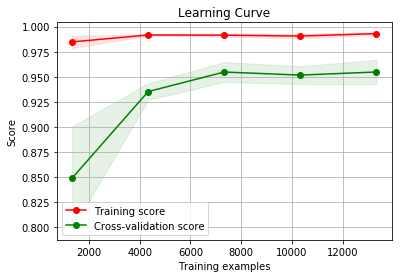

In [129]:
skplt.estimators.plot_learning_curve(rf, X_train, y_train)

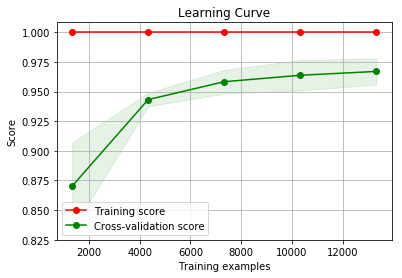

In [130]:
skplt.estimators.plot_learning_curve(et, X_train, y_train)

### Bigger Slice 

In [31]:
df_all = pd.read_csv('additive_6l_complete.csv')

In [21]:
df_ne= df[df.T_self != 300]

In [22]:
len(df_ne)

713293

In [32]:
df_all= df_all[df_all.T_self > 300]

In [17]:
len(df)

713293

In [18]:
df['T_self'].describe()

count    713293.000000
mean        986.026210
std         487.562673
min         301.000000
25%         689.752000
50%         845.512000
75%        1137.130000
max        6155.710000
Name: T_self, dtype: float64

In [12]:
import seaborn as sns

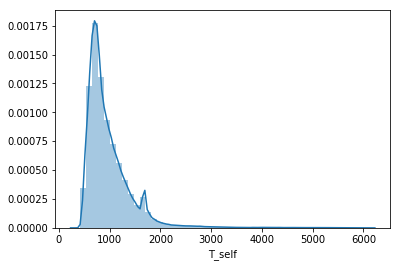

In [19]:
sns.distplot(df['T_self'])

In [28]:
df[df[df.columns]]

ValueError: Must pass DataFrame with boolean values only

In [29]:
df.head()

,timestep,x_voxel,y_voxel,z_voxel,timeOfCreation,x_laser,y_laser,z_laser,x_distance,y_distance,...,T18_t_t-1,T19_t_t-1,T20_t_t-1,T21_t_t-1,T22_t_t-1,T23_t_t-1,T24_t_t-1,T25_t_t-1,T26_t_t-1,T_self
9732,2.0,2.5,1.5,0.5,0.5,2.6,0.75,0.5,0.1,0.75,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,3549.99
9969,2.0,1.0,1.0,0.5,0.5,2.6,0.75,0.5,1.6,0.25,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2706.98
9995,2.0,2.0,0.5,0.5,0.5,2.6,0.75,0.5,0.6,0.25,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,3026.39
10072,2.0,0.5,1.0,0.5,0.5,2.6,0.75,0.5,2.1,0.25,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1876.72
10854,2.0,3.0,0.0,0.5,0.5,2.6,0.75,0.5,0.4,0.75,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2975.86


In [34]:
len(df)

713293

In [33]:
df_all.head()

,timestep,x_voxel,y_voxel,z_voxel,timeOfCreation,x_laser,y_laser,z_laser,x_distance,y_distance,...,T18_t_t-1,T19_t_t-1,T20_t_t-1,T21_t_t-1,T22_t_t-1,T23_t_t-1,T24_t_t-1,T25_t_t-1,T26_t_t-1,T_self
9732,2.0,2.5,1.5,0.5,0.5,2.6,0.75,0.5,0.1,0.75,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,3549.99
9969,2.0,1.0,1.0,0.5,0.5,2.6,0.75,0.5,1.6,0.25,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,2706.98
9995,2.0,2.0,0.5,0.5,0.5,2.6,0.75,0.5,0.6,0.25,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,3026.39
10072,2.0,0.5,1.0,0.5,0.5,2.6,0.75,0.5,2.1,0.25,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,1876.72
10854,2.0,3.0,0.0,0.5,0.5,2.6,0.75,0.5,0.4,0.75,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,2975.86


In [35]:
len(df_all)

713293

In [ ]:
featureColumns = ['timestep','x_distance','y_distance','z_distance','timeOfCreation','T0_t-1']+neighborColumns

X = df.loc[:,featureColumns ]
y = df['T_self']

In [157]:
testSplit = (len(df)*2/3)

X_train,y_train = shuffle(X[:testSplit], y[:testSplit])
X_test,y_test = shuffle(X[testSplit:], y[testSplit:])

### 120 timesteps 

In [137]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9015671763422058, 2.4759152732603735)

In [138]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9836482594366538, 0.22113689935917374)

In [139]:
et = ExtraTreesRegressor(n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9865315879637631, 0.3256310539435695)

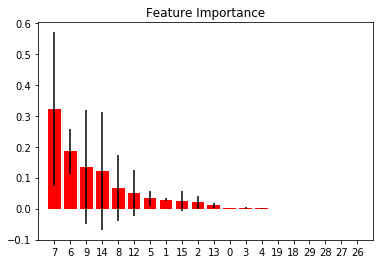

In [153]:
skplt.estimators.plot_feature_importances(et)

## 240 timesteps 
#### with some missing (160-240)

In [144]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9241556797669932, 3.2862762973532353)

In [145]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9797549684781324, 1.4378569760044153)

### ignore first few timesteps

In [146]:
featureColumns = ['timestep','x_distance','y_distance','z_distance','timeOfCreation','T0_t-1']+neighborColumns
ignoreSteps = 500000

X = df.loc[ignoreSteps:,featureColumns ]
y = df['T_self'][ignoreSteps:]

In [147]:
testSplit = (len(X)*2/3)
X_train,y_train = shuffle(X[:testSplit], y[:testSplit])
X_test,y_test = shuffle(X[testSplit:], y[testSplit:])

In [148]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9210932587314076, 3.834080042242656)

In [149]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9808526030905445, 1.0557080130225942)

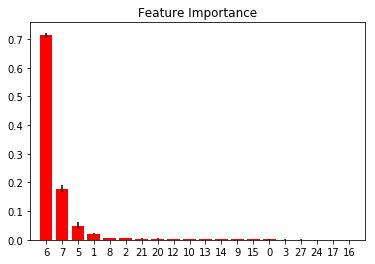

In [150]:
skplt.estimators.plot_feature_importances(rf)

In [151]:
rf.feature_importances_

array([1.26743774e-03, 2.05446893e-02, 5.87125180e-03, 8.71970087e-04,
       1.04258883e-04, 4.94239151e-02, 7.14058634e-01, 1.77960505e-01,
       6.55018063e-03, 1.85688630e-03, 2.22607095e-03, 9.28132040e-05,
       2.62221489e-03, 2.16644897e-03, 1.98431740e-03, 1.81310700e-03,
       3.37729691e-04, 3.47905958e-04, 6.29385633e-05, 5.07411828e-05,
       3.24508079e-03, 4.26876710e-03, 1.29627202e-04, 1.52101183e-04,
       4.84971965e-04, 1.82150637e-04, 3.01014812e-04, 7.71722991e-04,
       6.43016863e-05, 5.83659142e-05, 8.03806187e-05, 4.74984378e-05])

In [152]:
X.tail()

,timestep,x_distance,y_distance,z_distance,timeOfCreation,T0_t-1,T1_t_t-1,T2_t_t-1,T3_t_t-1,T4_t_t-1,...,T17_t_t-1,T18_t_t-1,T19_t_t-1,T20_t_t-1,T21_t_t-1,T22_t_t-1,T23_t_t-1,T24_t_t-1,T25_t_t-1,T26_t_t-1
2305435,319.0,15.731458,3.75,1.5,3.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.00,300.00,300.00,300.00,300.0,300.0,300.0,300.0
2305436,319.0,17.231458,2.75,0.5,2.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,1374.17,1297.72,1204.46,1353.23,300.0,300.0,300.0,300.0
2305437,319.0,0.268542,4.25,1.0,2.5,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.00,300.00,300.00,300.00,300.0,300.0,300.0,300.0
2305438,319.0,1.231458,1.25,1.0,2.5,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.00,300.00,300.00,300.00,300.0,300.0,300.0,300.0
2305439,319.0,15.731458,1.25,1.0,2.5,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.00,300.00,300.00,300.00,300.0,300.0,300.0,300.0


### <font color="red">6 layers ~ 320 timesteps </font>

In [158]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9275297699688945, 3.552670427251837)

In [160]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9858267201845053, 0.6955788277945743)

In [ ]:
skplt.estimators.plot_learning_curve(rf, X_train, y_train)

In [ ]:
skplt.estimators.plot_feature_importances(rf)

In [159]:
et = ExtraTreesRegressor(n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9875623522065079, 0.8184446365674432)

In [ ]:
skplt.estimators.plot_feature_importances(et)

### <font color="blue"> Removing rows which have output as 300 K </font>

In [188]:
df= df[df.T_self != 300]

In [189]:
len(df)

713589

In [167]:
X = df.loc[:,featureColumns ]
y = df['T_self']

In [168]:
testSplit = (len(X)*2/3)
X_train,y_train = shuffle(X[:testSplit], y[:testSplit])
X_test,y_test = shuffle(X[testSplit:], y[testSplit:])

In [169]:
linear = LinearRegression()
linear.fit(X_train,y_train)
predicted = linear.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.8543693893227516, 8.314697260452425)

In [170]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9699112244511034, 1.9820146573291797)

In [176]:
et = ExtraTreesRegressor(n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.976194287793818, 1.9181296950666709)

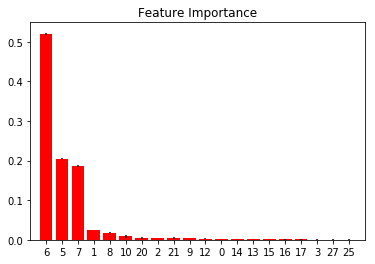

In [172]:
skplt.estimators.plot_feature_importances(rf)

In [183]:
for i in range(8):
    print i,featureColumns[i]

0 timestep
1 x_distance
2 y_distance
3 z_distance
4 timeOfCreation
5 T0_t-1
6 T1_t_t-1
7 T2_t_t-1


In [177]:
df['T1_t_t-1'].describe()

count    3.064314e+06
mean     4.558235e+02
std      3.695736e+02
min      4.000000e+00
25%      3.000000e+02
50%      3.000000e+02
75%      3.000000e+02
max      6.155710e+03
Name: T1_t_t-1, dtype: float64

In [178]:
df['T0_t-1'].describe()

count    3.064314e+06
mean     4.584994e+02
std      3.721506e+02
min      4.000000e+00
25%      3.000000e+02
50%      3.000000e+02
75%      3.000000e+02
max      6.155710e+03
Name: T0_t-1, dtype: float64

In [190]:
featureColumns = ['timestep','x_distance','y_distance','z_distance','timeOfCreation','T0_t-1','T1_t_t-1',
 'T2_t_t-1']
X = df.loc[:,featureColumns ]
y = df['T_self']

In [191]:
testSplit = (len(X)*2/3)
X_train,y_train = shuffle(X[:testSplit], y[:testSplit])
X_test,y_test = shuffle(X[testSplit:], y[testSplit:])

In [192]:
et = ExtraTreesRegressor(n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9455797829880931, 2.9023819770562658)

In [193]:
featureColumns = ['x_distance','y_distance','z_distance','T0_t-1','T1_t_t-1','T2_t_t-1']
X = df.loc[:,featureColumns ]
y = df['T_self']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [195]:
et = ExtraTreesRegressor(n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9662181059012295, 1.9364793706286008)

In [197]:
et

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [198]:
et = ExtraTreesRegressor(n_estimators=20, n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9675554719326577, 1.9114823378029124)

In [199]:
et = ExtraTreesRegressor(n_estimators=20, bootstrap=True, n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9671675359217299, 2.0406555435771483)

In [201]:
et = ExtraTreesRegressor(n_estimators=20, warm_start=True, n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9675283108676439, 1.8770810919529528)

In [204]:
et = ExtraTreesRegressor(n_estimators=50, n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9690579810966059, 1.8738446317332833)

<i> <font color="magenta">Warm start or bootstrap does not change the results </i></font>

In [200]:
ridge = Ridge()
ridge.fit(X_train,y_train)
predicted = ridge.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.7818965087893572, 8.960338327969183)

<i> <font color="magenta"> Linear or regularized models perform worse  </font></i>

In [38]:
featureColumns = ['timestep','x_distance','y_distance','z_distance','timeOfCreation','T0_t-1']+neighborColumns

X = df.loc[:,featureColumns ]
y = df['T_self']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=300)

In [52]:
et = ExtraTreesRegressor(n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9849704149292251, 0.8538389586848829)

In [209]:
et = ExtraTreesRegressor(n_estimators=20, n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9860568035257122, 0.9549417546346831)

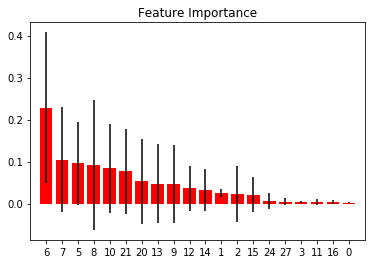

In [210]:
skplt.estimators.plot_feature_importances(et)

In [19]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
predicted = gb.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9563292708236754, 2.7040321362356137)

In [28]:
xgb = XGBRegressor(n_jobs=-1)
xgb.fit(X_train,y_train)
predicted = gb.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9563292708236754, 2.7040321362356137)

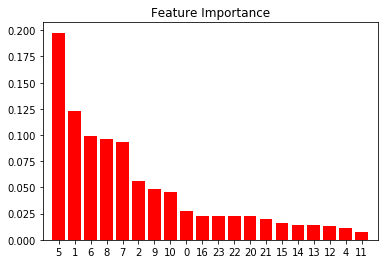

In [29]:
skplt.estimators.plot_feature_importances(xgb)

In [22]:
bag = BaggingRegressor()
bag.fit(X_train,y_train)
predicted = bag.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9813519268618175, 0.9022798893209252)

In [ ]:
bag = BaggingRegressor(n_estimators=20, n_jobs=-1)
bag.fit(X_train,y_train)
predicted = bag.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

In [23]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
predicted = ada.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.7678631869201157, 23.04998816859087)

### After setting temperature values for unproduced values to -99

In [50]:
et = ExtraTreesRegressor(n_jobs=-1)
et.fit(X_train,y_train)
predicted = et.predict(X_test)
r2(y_test,predicted) ,mape(y_test,predicted)

(0.9845307970923405, 0.8850030643988662)

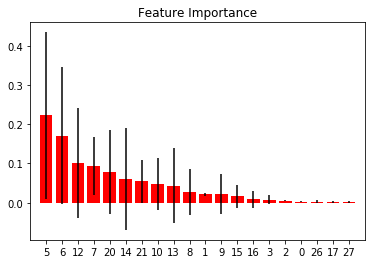

In [53]:
skplt.estimators.plot_feature_importances(et)

In [6]:
historicalColumns,neighborColumns = [],[]

for historical in range(5):
    historicalColumns += ['Tminus'+str(historical+1)]

for neighbor in range(26):
    neighborColumns += ['T'+str(neighbor+1)+'_t-1']

columns = ['timestep','x_voxel','y_voxel','z_voxel','layerNum','time_creation','x_laser','y_laser','z_laser','x_distance','y_distance','z_distance','euclidean_distance_laser'] + historicalColumns+ neighborColumns+['T_self']



In [7]:
def combineDataFrames(prefix,columns=columns):
    List = []
    nums_start,nums_stop = [],[]
    for item in os.listdir(prefix):
        if "data_" in item and ".npy" in item:
            timeStep_start = int(item.split(prefix+'_')[1].split('_')[0])
            nums_start += [timeStep_start]
            
            timeStep_stop = int(item.split('_')[3].split('.npy')[0])
            nums_stop += [timeStep_stop]
            
    nums_start = sorted(nums_start)
    nums_stop = sorted(nums_stop)
    
    array = loadNumpy(prefix+'/'+prefix+'_'+str(nums_start[0])+'_'+str(nums_stop[0])+'.npy')
    for i in range(1,len(nums_start)):
        newFile = prefix+'/'+prefix+'_'+str(nums_start[i])+'_'+str(nums_stop[i])+'.npy'
        array = np.append(array,loadNumpy(newFile),axis=0)
    return pd.DataFrame(array,columns=columns)

In [8]:
df = combineDataFrames('data_big')

In [16]:
df_mini = df[df[]]

timestep    576.0
x_voxel      17.0
y_voxel       4.0
z_voxel       2.5
layerNum      5.0
Name: 2267913, dtype: float64

### Experiments
* More voxels 
* More layers 

In [4]:
if (i>2 or i<4) and i%3 ==0:
    print 'yes'

yes
